In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# path='/content/drive/MyDrive/Banana_data/Training'

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2023-05-08 22:23:52.101072: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 22:23:52.129792: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 22:23:52.130399: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 22:23:52.882043: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.__version__

'2.12.0'

In [12]:
# !pip install tensorflow==

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=3

In [4]:
path="/home/vandit/banana_neha/potato-disease-classification/Banana_data/Training"

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    
)


Found 1192 files belonging to 3 classes.


2023-05-08 22:24:01.185097: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-05-08 22:24:01.185134: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: vandit
2023-05-08 22:24:01.185139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: vandit
2023-05-08 22:24:01.185202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.105.17
2023-05-08 22:24:01.185216: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 525.105.17
2023-05-08 22:24:01.185220: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 525.105.17


In [6]:
classes_name=dataset.class_names
classes_name

['Banana G1', 'Banana G2', 'Banana Rotten']

In [7]:
len(dataset)

38

### 0- kacha banana
### 1- pakka banana
### 2- bekar banana

2023-05-08 22:24:05.947426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1192]
	 [[{{node Placeholder/_4}}]]
2023-05-08 22:24:05.947653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1192]
	 [[{{node Placeholder/_0}}]]


(32, 256, 256, 3)
[0 2 0 0 0 0 0 0 0 2 0 0 2 1 0 0 0 2 2 2 2 0 0 0 0 2 0 0 2 2 2 0]


/tmp/ipykernel_23652/420520284.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


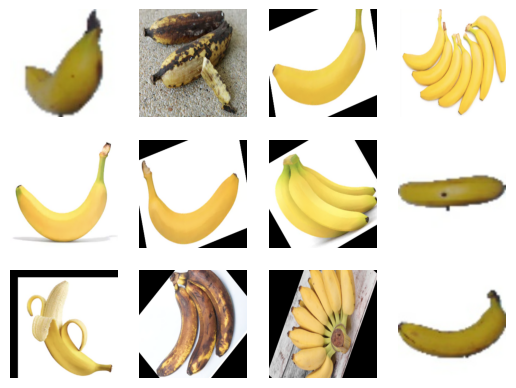

In [8]:
# iterating throught the first batch of 32 images
for image_batch, labels_batch in dataset.take(1):

    print(image_batch.shape)
    print(labels_batch.numpy())
    plt.imshow(image_batch[3]/255.0)
    # printing the first 12 images of this batch
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i]/255.0)
        plt.axis('off')
    plt.show()


In [9]:
train_size=0.8  
len(dataset)*0.8
# from here we got to know that first 30 batches should be assigned to training set and the rest to validation set


30.400000000000002

In [10]:
# assigning the first 30 batches to training set
train_ds=dataset.take(30)

In [11]:
# now for the test dataset we will take the rest of the batches
test_ds=dataset.skip(30)
len(test_ds)

8

In [12]:
val_size=0.1
len( dataset)*0.1

3.8000000000000003

In [13]:
val_dataset=test_ds.take(4)
test_dataset=test_ds.skip(4)

In [14]:
# optimising our training dataset, so that it can be trained faster
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset=val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset=test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [15]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [17]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    # resize_rescale,
    # data_augmentation,
    # 32 filter of size (3,3) stride=1
    layers.Conv2D(32,(3,3),padding='same',activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
])

model.build(input_shape=input_shape)



In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 128, 128, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 126, 126, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 63, 63, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 61, 61, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 30, 30, 64)        

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_dataset

)

Epoch 1/3


2023-05-08 22:24:17.273501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1192]
	 [[{{node Placeholder/_4}}]]
2023-05-08 22:24:17.273822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1192]
	 [[{{node Placeholder/_4}}]]


30/30 [==============================] - ETA: 0s - loss: 1.4134 - accuracy: 0.6250

2023-05-08 22:24:49.061548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1192]
	 [[{{node Placeholder/_4}}]]
2023-05-08 22:24:49.061854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1192]
	 [[{{node Placeholder/_0}}]]


30/30 [==============================] - 33s 1s/step - loss: 1.4134 - accuracy: 0.6250 - val_loss: 0.4409 - val_accuracy: 0.7891
Epoch 2/3
30/30 [==============================] - 31s 1s/step - loss: 0.3086 - accuracy: 0.9010 - val_loss: 0.1556 - val_accuracy: 0.9375
Epoch 3/3
30/30 [==============================] - 30s 999ms/step - loss: 0.2088 - accuracy: 0.9271 - val_loss: 0.0922 - val_accuracy: 0.9609


In [21]:
scores=model.evaluate(test_dataset)

2023-05-08 22:25:51.159870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1192]
	 [[{{node Placeholder/_4}}]]
2023-05-08 22:25:51.160253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1192]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - 1s 136ms/step - loss: 0.0323 - accuracy: 1.0000


In [22]:
scores

[0.03231925889849663, 1.0]

In [23]:
history

In [24]:
history.params

{'verbose': 1, 'epochs': 3, 'steps': 30}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation Accuracy')

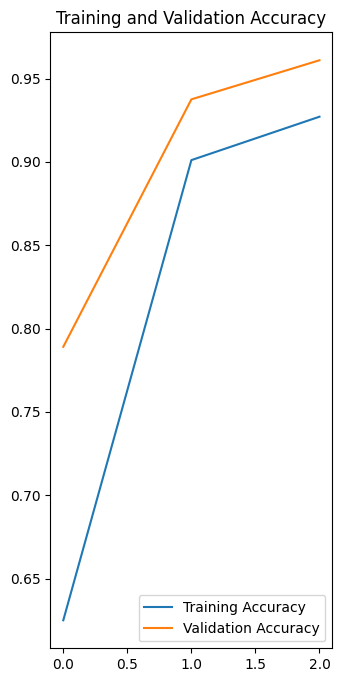

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


first image to show
actual label:  Banana G1
1/1 [==============================] - 0s 56ms/step


2023-05-08 22:28:26.394057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1192]
	 [[{{node Placeholder/_0}}]]
2023-05-08 22:28:26.394482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1192]
	 [[{{node Placeholder/_4}}]]


prediction is  Banana G2


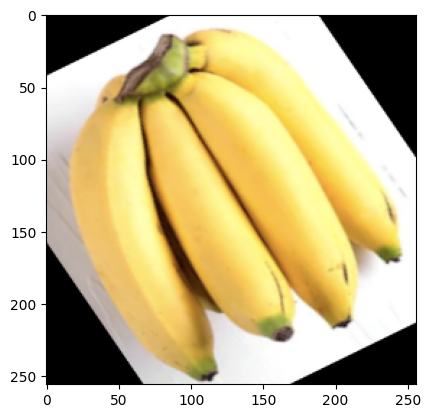

In [82]:
import numpy as np
for image_batch, label_batch in test_dataset.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    print("first image to show")
    plt.imshow(first_image)
    print("actual label: ",classes_name[first_label])

    batch_prediction=model.predict(image_batch)
    print("prediction is ",classes_name[np.argmax(batch_prediction[0])])

In [29]:
model_version=2
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/2/assets


INFO:tensorflow:Assets written to: ./models/2/assets


In [30]:
# import os
# model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/Banana_data/models")+[0]])+1
# model.save(f"/content/drive/MyDrive/Banana_data/models{model_version}")

### building web server

In [31]:
from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
from io import BytesIO
from PIL import Image

<class 'tensorflow.python.framework.ops.EagerTensor'>
(256, 256, 3)
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step


2023-05-08 22:29:57.119202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1192]
	 [[{{node Placeholder/_0}}]]
2023-05-08 22:29:57.119530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1192]
	 [[{{node Placeholder/_0}}]]


the banana is :  Banana_G1
confidence is :  0.99994516


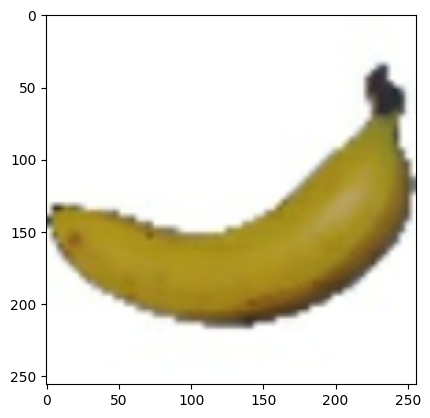

In [98]:

MODEL = tf.keras.models.load_model("./1")
CLASS_NAMES = ["Banana_G1", "Banana_G2", "Rotten"]
# image = read_file_as_image(await file.read())
for image_batch, label_batch in test_dataset.take(1):
  print(type(image_batch[0]))
  print(image_batch[0].shape)
  print(image_batch[0].numpy().astype('uint8').shape)
  first_image=image_batch[0].numpy().astype('uint8')
  first_label=label_batch[0].numpy()
  plt.imshow(first_image)
  img_batch = np.expand_dims(first_image, 0)
  predictions = MODEL.predict(img_batch)

  predicted_class = CLASS_NAMES[np.argmax(predictions[0])]

  confidence = np.max(predictions[0])
  print("the banana is : ",predicted_class)
  print("confidence is : ",confidence )

In [45]:


app = FastAPI()

# origins = [
#     "http://localhost",
#     "http://localhost:3000",
# ]
# app.add_middleware(
#     CORSMiddleware,
#     allow_origins=origins,
#     allow_credentials=True,
#     allow_methods=["*"],
#     allow_headers=["*"],
# )

MODEL = tf.keras.models.load_model("./1")
CLASS_NAMES = ["Banana_G1", "Banana_G2", "Rotten"]

@app.get("/ping")
async def ping():
    return "Hello, I am alive"

def read_file_as_image(data) -> np.ndarray:
    image = np.array(Image.open(BytesIO(data)))
    return image

@app.post("/predict")
async def predict(
    file: UploadFile = File(...)
):
    image = read_file_as_image(await file.read())
    print(type(image))
    return {"image_type":type(image)}
    # first_image=image.numpy().astype('uint8')
    # plt.imshow(first_image)

    # # first_image=image_batch[0].numpy().astype('uint8')
    # # first_label=label_batch[0].numpy()
    # # plt.imshow(first_image)
    # img_batch = np.expand_dims(first_image, 0)
    # predictions = MODEL.predict(img_batch)

    # predicted_class = CLASS_NAMES[np.argmax(predictions[0])]

    # confidence = np.max(predictions[0])
    # print("the banana is : ",predicted_class)
    # print("confidence is : ",confidence )
    # # img_batch = np.expand_dims(image, 0)
    
    # # predictions = MODEL.predict(img_batch)

    # # predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    # # confidence = np.max(predictions[0])
    # return {
    #     'class': predicted_class,
    #     'confidence': float(confidence)
    # }

